# Imports

In [1]:
import torch
from torch import Tensor
from torchvision.utils import save_image

from models.type import Type as ModelType
from data.type import Type as DataType
from results.results import Results
from train.params import Params
from train.builder import build_params
from IPython.display import Image

import ssl

from train.train_wgan import TrainWGan
from train.train_dcgan import TrainDCGan

ssl._create_default_https_context = ssl._create_unverified_context

# Generate Images Function

In [2]:
def generate_images(generator: torch.nn.Module, module_name: str):
    fixed_noise: Tensor = torch.randn(2, 100)
    if torch.cuda.is_available():
        fixed_noise = fixed_noise.cuda()

    generated_image = generator(fixed_noise)
    image_path_1 = "results/" + module_name + "_1.png"
    image_path_2 = "results/" + module_name + "_2.png"
    save_image(generated_image.data[0], image_path_1, nrow=1, normalize=True)
    save_image(generated_image.data[1], image_path_2, nrow=1, normalize=True) 
    
    display(Image(filename=image_path_1))
    display(Image(filename=image_path_2))

# Plot Function

In [3]:
import matplotlib.pyplot as plt

def plot(title: str, x_label: str, y_label: str, line1_label: str, line1_values: {}, 
         line2_label: str, line2_values: {}):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line1_x_values: [] = []
    line1_y_values: [] = []

    for key in line1_values:
        line1_x_values.append(key)
        line1_y_values.append(line1_values[key])

    plt.plot(line1_x_values, line1_y_values, label=line1_label)

    line2_x_values: [] = []
    line2_y_values: [] = []

    for key in line2_values:
        line2_x_values.append(key)
        line2_y_values.append(line2_values[key])

    plt.plot(line2_x_values, line2_y_values, label=line2_label)
    
    plt.legend(loc='best')
    plt.show()

# Train WGan

In [4]:
args: {} = {}
args["epochs"] = 1 # number of epochs of training
args["batch_size"] = 64 # size of the batches
args["lr"] = 0.0002 # adam: learning rate
args["b1"] = 0.5 # adam: decay of first order momentum of gradient
args["b2"] = 0.999 # adam: decay of first order momentum of gradient
args["latent_dim"] = 100 # dimensionality of the latent space
args["critic"] = 5 # number of training steps for discriminator per iter
args["gradient_penalty_lambda"] = 10 # loss weight for gradient penalty
args["save_generated_image_every"] = 50 # interval batches between saving image

### WGan with Fashion-Mnist

In [5]:
wgan_fashion_mnist_results: Results = Results("wgan_fashion_mnist")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.FASHION_MNIST)
    
train: TrainWGan = TrainWGan(params, wgan_fashion_mnist_results.loss_updated_callback)
train.run()

[Epoch 1/1] [Batch 1/938] [Discriminator loss: 7.873785] [Generator loss: 0.024201]
[Epoch 1/1] [Batch 6/938] [Discriminator loss: 3.901337] [Generator loss: 0.013850]
[Epoch 1/1] [Batch 11/938] [Discriminator loss: -4.748446] [Generator loss: -0.033496]
[Epoch 1/1] [Batch 16/938] [Discriminator loss: -14.571273] [Generator loss: -0.182722]
[Epoch 1/1] [Batch 21/938] [Discriminator loss: -22.252674] [Generator loss: -0.402982]
[Epoch 1/1] [Batch 26/938] [Discriminator loss: -25.750330] [Generator loss: -0.597249]
[Epoch 1/1] [Batch 31/938] [Discriminator loss: -24.493284] [Generator loss: -0.778336]
[Epoch 1/1] [Batch 36/938] [Discriminator loss: -25.024673] [Generator loss: -0.984847]
[Epoch 1/1] [Batch 41/938] [Discriminator loss: -25.231779] [Generator loss: -1.221635]
[Epoch 1/1] [Batch 46/938] [Discriminator loss: -25.623959] [Generator loss: -1.505807]
[Epoch 1/1] [Batch 51/938] [Discriminator loss: -25.042435] [Generator loss: -1.741307]
[Epoch 1/1] [Batch 56/938] [Discriminator

[Epoch 1/1] [Batch 466/938] [Discriminator loss: -4.943048] [Generator loss: -1.513283]
[Epoch 1/1] [Batch 471/938] [Discriminator loss: -5.254999] [Generator loss: -2.933253]
[Epoch 1/1] [Batch 476/938] [Discriminator loss: -5.821069] [Generator loss: -0.923773]
[Epoch 1/1] [Batch 481/938] [Discriminator loss: -5.612315] [Generator loss: -2.070788]
[Epoch 1/1] [Batch 486/938] [Discriminator loss: -6.205328] [Generator loss: 0.168238]
[Epoch 1/1] [Batch 491/938] [Discriminator loss: -5.800390] [Generator loss: -2.311661]
[Epoch 1/1] [Batch 496/938] [Discriminator loss: -4.854366] [Generator loss: -3.246915]
[Epoch 1/1] [Batch 501/938] [Discriminator loss: -5.841336] [Generator loss: -1.802134]
[Epoch 1/1] [Batch 506/938] [Discriminator loss: -5.956121] [Generator loss: -1.237639]
[Epoch 1/1] [Batch 511/938] [Discriminator loss: -5.940401] [Generator loss: -2.180088]
[Epoch 1/1] [Batch 516/938] [Discriminator loss: -6.405570] [Generator loss: -3.398792]
[Epoch 1/1] [Batch 521/938] [Disc

[Epoch 1/1] [Batch 936/938] [Discriminator loss: -5.052162] [Generator loss: -0.035790]


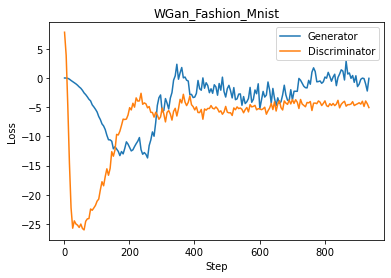

In [6]:
wgan_fashion_mnist_generator_losses: {} = wgan_fashion_mnist_results.generator_losses
wgan_fashion_mnist_discriminator_losses: {} = wgan_fashion_mnist_results.discriminator_losses

plot("WGan_Fashion_Mnist", "Step", "Loss", 
     "Generator", wgan_fashion_mnist_generator_losses, 
     "Discriminator", wgan_fashion_mnist_discriminator_losses)

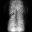

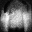

In [7]:
wgan_fashion_mnist_last_generator: torch.nn.Module = wgan_fashion_mnist_results.last_generator
generate_images(wgan_fashion_mnist_last_generator, "wgan_fashion_mnist")

### WGan with Mnist

In [8]:
wgan_mnist_results: Results = Results("wgan_mnist")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.MNIST)
    
train: TrainWGan = TrainWGan(params, wgan_mnist_results.loss_updated_callback)
train.run()

[Epoch 1/1] [Batch 1/938] [Discriminator loss: 8.310477] [Generator loss: -0.027509]
[Epoch 1/1] [Batch 6/938] [Discriminator loss: 3.867913] [Generator loss: -0.043784]
[Epoch 1/1] [Batch 11/938] [Discriminator loss: -6.633616] [Generator loss: -0.101405]
[Epoch 1/1] [Batch 16/938] [Discriminator loss: -21.576265] [Generator loss: -0.264485]
[Epoch 1/1] [Batch 21/938] [Discriminator loss: -34.067581] [Generator loss: -0.575988]
[Epoch 1/1] [Batch 26/938] [Discriminator loss: -39.878616] [Generator loss: -0.922421]
[Epoch 1/1] [Batch 31/938] [Discriminator loss: -40.866699] [Generator loss: -1.249537]
[Epoch 1/1] [Batch 36/938] [Discriminator loss: -40.282146] [Generator loss: -1.588763]
[Epoch 1/1] [Batch 41/938] [Discriminator loss: -41.247849] [Generator loss: -1.959338]
[Epoch 1/1] [Batch 46/938] [Discriminator loss: -40.302521] [Generator loss: -2.291236]
[Epoch 1/1] [Batch 51/938] [Discriminator loss: -40.524235] [Generator loss: -2.779611]
[Epoch 1/1] [Batch 56/938] [Discriminat

[Epoch 1/1] [Batch 466/938] [Discriminator loss: -2.032790] [Generator loss: -11.809728]
[Epoch 1/1] [Batch 471/938] [Discriminator loss: -1.767362] [Generator loss: -10.988163]
[Epoch 1/1] [Batch 476/938] [Discriminator loss: -2.262030] [Generator loss: -9.689165]
[Epoch 1/1] [Batch 481/938] [Discriminator loss: -1.934237] [Generator loss: -9.894402]
[Epoch 1/1] [Batch 486/938] [Discriminator loss: -2.292467] [Generator loss: -9.839870]
[Epoch 1/1] [Batch 491/938] [Discriminator loss: -2.704905] [Generator loss: -9.960886]
[Epoch 1/1] [Batch 496/938] [Discriminator loss: -2.546754] [Generator loss: -9.543620]
[Epoch 1/1] [Batch 501/938] [Discriminator loss: -2.464449] [Generator loss: -7.263513]
[Epoch 1/1] [Batch 506/938] [Discriminator loss: -2.862906] [Generator loss: -6.393685]
[Epoch 1/1] [Batch 511/938] [Discriminator loss: -3.275602] [Generator loss: -5.660005]
[Epoch 1/1] [Batch 516/938] [Discriminator loss: -2.839730] [Generator loss: -5.011618]
[Epoch 1/1] [Batch 521/938] [D

[Epoch 1/1] [Batch 936/938] [Discriminator loss: -7.631315] [Generator loss: 1.340605]


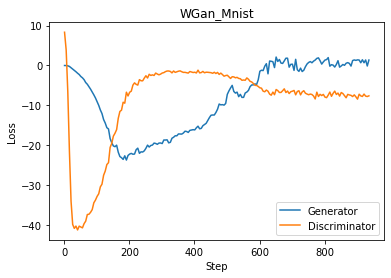

In [9]:
wgan_mnist_generator_losses: {} = wgan_mnist_results.generator_losses
wgan_mnist_discriminator_losses: {} = wgan_mnist_results.discriminator_losses

plot("WGan_Mnist", "Step", "Loss", 
     "Generator", wgan_mnist_generator_losses, 
     "Discriminator", wgan_mnist_discriminator_losses)

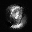

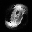

In [10]:
wgan_mnist_last_generator: torch.nn.Module = wgan_mnist_results.last_generator
generate_images(wgan_mnist_last_generator, "wgan_mnist")

### WGan with Cifar10

In [11]:
wgan_cifar10_results: Results = Results("wgan_cifar10")

params: Params = build_params(args, ModelType.WGAN_GP, DataType.CIFAR10)
    
train: TrainWGan = TrainWGan(params, wgan_cifar10_results.loss_updated_callback)
train.run()

Files already downloaded and verified
[Epoch 1/1] [Batch 1/782] [Discriminator loss: 8.023685] [Generator loss: 0.037054]
[Epoch 1/1] [Batch 6/782] [Discriminator loss: 4.426694] [Generator loss: 0.021999]
[Epoch 1/1] [Batch 11/782] [Discriminator loss: -0.855850] [Generator loss: -0.075165]
[Epoch 1/1] [Batch 16/782] [Discriminator loss: -4.593712] [Generator loss: -0.243568]
[Epoch 1/1] [Batch 21/782] [Discriminator loss: -6.986066] [Generator loss: -0.395720]
[Epoch 1/1] [Batch 26/782] [Discriminator loss: -9.532028] [Generator loss: -0.471701]
[Epoch 1/1] [Batch 31/782] [Discriminator loss: -12.792260] [Generator loss: -0.588921]
[Epoch 1/1] [Batch 36/782] [Discriminator loss: -16.598328] [Generator loss: -0.765288]
[Epoch 1/1] [Batch 41/782] [Discriminator loss: -17.689434] [Generator loss: -0.879538]
[Epoch 1/1] [Batch 46/782] [Discriminator loss: -16.176258] [Generator loss: -1.165065]
[Epoch 1/1] [Batch 51/782] [Discriminator loss: -16.541260] [Generator loss: -1.539863]
[Epoch

[Epoch 1/1] [Batch 466/782] [Discriminator loss: -10.118366] [Generator loss: 1.826654]
[Epoch 1/1] [Batch 471/782] [Discriminator loss: -11.257257] [Generator loss: 3.399004]
[Epoch 1/1] [Batch 476/782] [Discriminator loss: -11.299860] [Generator loss: 4.601402]
[Epoch 1/1] [Batch 481/782] [Discriminator loss: -11.597002] [Generator loss: 3.182247]
[Epoch 1/1] [Batch 486/782] [Discriminator loss: -10.932440] [Generator loss: 3.654322]
[Epoch 1/1] [Batch 491/782] [Discriminator loss: -10.841937] [Generator loss: 4.289631]
[Epoch 1/1] [Batch 496/782] [Discriminator loss: -11.298741] [Generator loss: 3.487754]
[Epoch 1/1] [Batch 501/782] [Discriminator loss: -9.949266] [Generator loss: 2.793375]
[Epoch 1/1] [Batch 506/782] [Discriminator loss: -9.567106] [Generator loss: 1.837822]
[Epoch 1/1] [Batch 511/782] [Discriminator loss: -10.612636] [Generator loss: 1.179102]
[Epoch 1/1] [Batch 516/782] [Discriminator loss: -10.335830] [Generator loss: 1.224564]
[Epoch 1/1] [Batch 521/782] [Discr

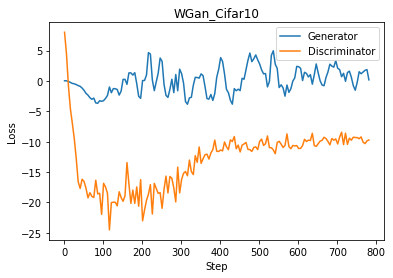

In [12]:
wgan_cifar10_generator_losses: {} = wgan_cifar10_results.generator_losses
wgan_cifar10_discriminator_losses: {} = wgan_cifar10_results.discriminator_losses

plot("WGan_Cifar10", "Step", "Loss", 
     "Generator", wgan_cifar10_generator_losses, 
     "Discriminator", wgan_cifar10_discriminator_losses)

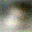

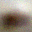

In [13]:
wgan_cifar10_last_generator: torch.nn.Module = wgan_cifar10_results.last_generator
generate_images(wgan_cifar10_last_generator, "wgan_cifar10")

# Train DCGan

In [14]:
args: {} = {}
args["epochs"] = 1 # number of epochs of training
args["batch_size"] = 64 # size of the batches
args["lr"] = 0.0002 # adam: learning rate
args["b1"] = 0.5 # adam: decay of first order momentum of gradient
args["b2"] = 0.999 # adam: decay of first order momentum of gradient
args["latent_dim"] = 100 # dimensionality of the latent space
args["save_generated_image_every"] = 50 # interval batches between saving image

### DCGan with Fashion-Mnist

In [ ]:
dcgan_fashion_mnist_results: Results = Results("dcgan_fashion_mnist")

params: Params = build_params(args, ModelType.DCGAN, DataType.FASHION_MNIST)
    
train: TrainDCGan = TrainDCGan(params, dcgan_fashion_mnist_results.loss_updated_callback)
train.run()

[Epoch 1/1] [Batch 1/938] [Discriminator loss: 0.693408] [Generator loss: 0.712734]
[Epoch 1/1] [Batch 2/938] [Discriminator loss: 0.693381] [Generator loss: 0.712097]
[Epoch 1/1] [Batch 3/938] [Discriminator loss: 0.693343] [Generator loss: 0.711433]
[Epoch 1/1] [Batch 4/938] [Discriminator loss: 0.693291] [Generator loss: 0.710662]
[Epoch 1/1] [Batch 5/938] [Discriminator loss: 0.693251] [Generator loss: 0.709964]
[Epoch 1/1] [Batch 6/938] [Discriminator loss: 0.693252] [Generator loss: 0.709386]
[Epoch 1/1] [Batch 7/938] [Discriminator loss: 0.693114] [Generator loss: 0.708631]
[Epoch 1/1] [Batch 8/938] [Discriminator loss: 0.693189] [Generator loss: 0.707991]
[Epoch 1/1] [Batch 9/938] [Discriminator loss: 0.693158] [Generator loss: 0.707234]
[Epoch 1/1] [Batch 10/938] [Discriminator loss: 0.693076] [Generator loss: 0.706608]
[Epoch 1/1] [Batch 11/938] [Discriminator loss: 0.693027] [Generator loss: 0.705907]
[Epoch 1/1] [Batch 12/938] [Discriminator loss: 0.692968] [Generator loss:

In [ ]:
dcgan_fashion_mnist_generator_losses: {} = dcgan_fashion_mnist_results.generator_losses
dcgan_fashion_mnist_discriminator_losses: {} = dcgan_fashion_mnist_results.discriminator_losses

plot("DCGan_Fashion_Mnist", "Step", "Loss", 
     "Generator", dcgan_fashion_mnist_generator_losses, 
     "Discriminator", dcgan_fashion_mnist_discriminator_losses)

In [ ]:
dcgan_mnist_last_generator: torch.nn.Module = dcgan_mnist_results.last_generator
generate_images(dcgan_mnist_last_generator, "dcgan_fashion_mnist")

### DCGan with Mnist

In [ ]:
dcgan_mnist_results: Results = Results("dcgan_mnist")

params: Params = build_params(args, ModelType.DCGAN, DataType.MNIST)
    
train: TrainDCGan = TrainDCGan(params, dcgan_mnist_results.loss_updated_callback)
train.run()

In [ ]:
dcgan_mnist_generator_losses: {} = dcgan_mnist_results.generator_losses
dcgan_mnist_discriminator_losses: {} = dcgan_mnist_results.discriminator_losses

plot("DCGan_Mnist", "Step", "Loss", 
     "Generator", dcgan_mnist_generator_losses, 
     "Discriminator", dcgan_mnist_discriminator_losses)

In [ ]:
dcgan_mnist_last_generator: torch.nn.Module = dcgan_mnist_results.last_generator
generate_images(dcgan_mnist_last_generator, "dcgan_mnist")

### DCGan with Cifar10

In [ ]:
dcgan_cifar10_results: Results = Results("dcgan_cifar10")

params: Params = build_params(args, ModelType.DCGAN, DataType.CIFAR10)
    
train: TrainDCGan = TrainDCGan(params, dcgan_cifar10_results.loss_updated_callback)
train.run()

In [ ]:
dcgan_cifar10_generator_losses: {} = dcgan_cifar10_results.generator_losses
dcgan_cifar10_discriminator_losses: {} = dcgan_cifar10_results.discriminator_losses

plot("DCGan_Cifar10", "Step", "Loss", 
     "Generator", dcgan_cifar10_generator_losses, 
     "Discriminator", dcgan_cifar10_discriminator_losses)

In [ ]:
dcgan_cifar10_last_generator: torch.nn.Module = dcgan_cifar10_results.last_generator
generate_images(dcgan_cifar10_last_generator, "dcgan_cifar10")